In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore')

In [142]:
df = pd.read_csv(r'C:\Users\ashu1\OneDrive\Desktop\My Projects Data\Churn_Modelling.csv')

In [143]:
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [144]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [145]:
df.shape

(10000, 14)

In [146]:
y = df['Exited']
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)

In [147]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [148]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)
X = X.drop(['Geography', 'Gender'], axis = 1)
X = pd.concat([X, geography, gender], axis = 1)

In [149]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [150]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [152]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [153]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout

In [154]:
classifier = Sequential()
classifier.add(Dense(units = 6, activation = 'relu', kernel_initializer = 'he_uniform', input_dim = 11))
classifier.add(Dense(units = 6, activation = 'relu', kernel_initializer = 'he_uniform'))
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))

In [155]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [156]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [157]:
model = classifier.fit(X_train, y_train, validation_split = 0.3, batch_size = 10, epochs = 25)

Train on 5250 samples, validate on 2250 samples
Epoch 1/25
5250/5250 [==============================] - 3s 523us/step - loss: 0.5702 - acc: 0.7419 - val_loss: 0.4933 - val_acc: 0.7907
Epoch 2/25
5250/5250 [==============================] - 2s 445us/step - loss: 0.4681 - acc: 0.7968 - val_loss: 0.4534 - val_acc: 0.7924
Epoch 3/25
5250/5250 [==============================] - 2s 449us/step - loss: 0.4420 - acc: 0.8000 - val_loss: 0.4385 - val_acc: 0.7933
Epoch 4/25
5250/5250 [==============================] - 2s 434us/step - loss: 0.4306 - acc: 0.7990 - val_loss: 0.4319 - val_acc: 0.7956
Epoch 5/25
5250/5250 [==============================] - 2s 442us/step - loss: 0.4221 - acc: 0.8027 - val_loss: 0.4266 - val_acc: 0.7978
Epoch 6/25
5250/5250 [==============================] - 2s 431us/step - loss: 0.4106 - acc: 0.8124 - val_loss: 0.4085 - val_acc: 0.8240
Epoch 7/25
5250/5250 [==============================] - 2s 462us/step - loss: 0.3919 - acc: 0.8335 - val_loss: 0.3966 - val_acc: 0.8324


In [158]:
model.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

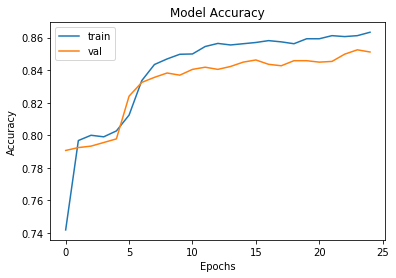

In [159]:
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc = 'upper_left')
plt.show();

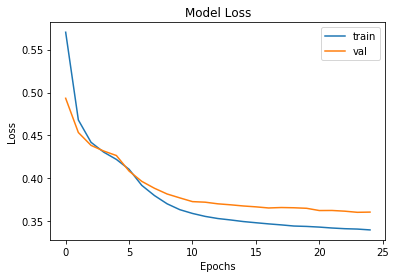

In [160]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc = 'upper_left')
plt.show();

In [161]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [162]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1930,   73],
       [ 271,  226]], dtype=int64)

In [169]:
from sklearn.metrics import accuracy_score
print((accuracy_score(y_test, y_pred)*100))

86.24000000000001
